<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon May  6 17:46:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.17                 Driver Version: 546.17       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P5               7W /  35W |    212MiB /  4096MiB |     34%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.2+cu118


'cuda'

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

PATH = 'D:\\Coding_Stuff\\GitHub\\ZTM-PyTorch\\'
train_data = MNIST(root = PATH,
                   download=True,
                   train=True,
                   transform=ToTensor())
test_data = MNIST(root=PATH,
                  download=True,
                  train=False,
                  transform=ToTensor())


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:20<00:00, 479063.11it/s] 


Extracting D:\Coding_Stuff\GitHub\ZTM-PyTorch\MNIST\raw\train-images-idx3-ubyte.gz to D:\Coding_Stuff\GitHub\ZTM-PyTorch\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 94572.61it/s]


Extracting D:\Coding_Stuff\GitHub\ZTM-PyTorch\MNIST\raw\train-labels-idx1-ubyte.gz to D:\Coding_Stuff\GitHub\ZTM-PyTorch\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:07<00:00, 232272.49it/s]


Extracting D:\Coding_Stuff\GitHub\ZTM-PyTorch\MNIST\raw\t10k-images-idx3-ubyte.gz to D:\Coding_Stuff\GitHub\ZTM-PyTorch\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 396473.02it/s]


Extracting D:\Coding_Stuff\GitHub\ZTM-PyTorch\MNIST\raw\t10k-labels-idx1-ubyte.gz to D:\Coding_Stuff\GitHub\ZTM-PyTorch\MNIST\raw



In [4]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Text(0.5, 1.0, '1 - one')

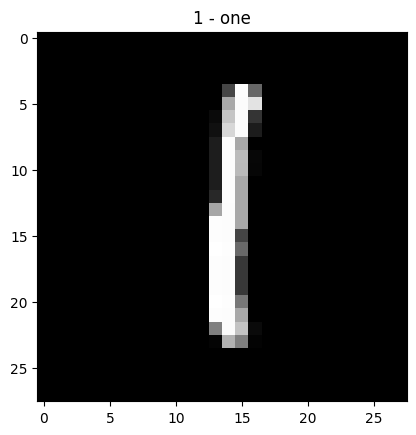

In [33]:
import matplotlib.pyplot as plt 
import random 

n_rows, n_cols = 3,3
images = random.choices(train_data,k=1)

plt.imshow(images[0][0].squeeze(), cmap='grey')
plt.title(label=class_names[images[0][1]])

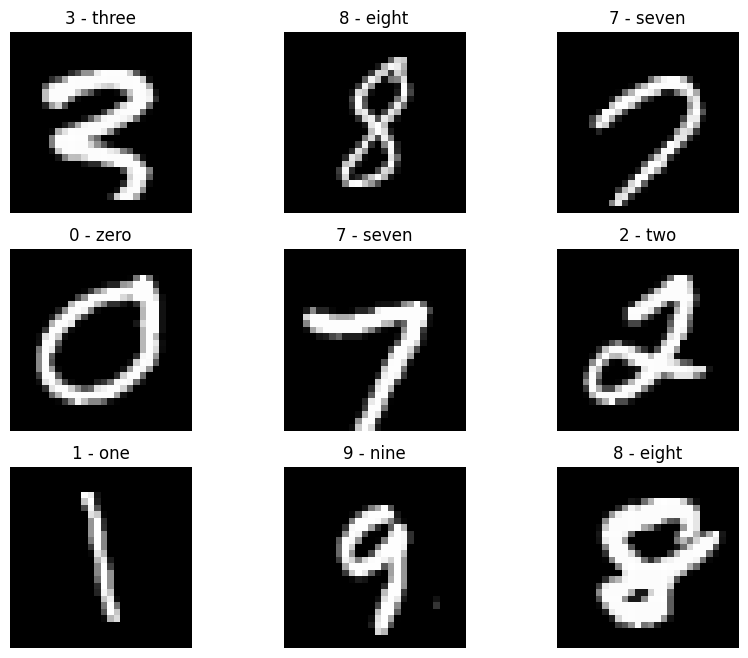

In [39]:
import matplotlib.pyplot as plt 
import random

torch.manual_seed(32)
n_rows, n_cols = 3,3

plt.figure(figsize=(10,8))
for i in range(1,n_rows*n_cols +1):
    image,label = random.choice(train_data)
    plt.subplot(n_rows,n_cols,i)
    plt.imshow(image[0].squeeze(), cmap='grey')
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [41]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers=2)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=True,
                             num_workers=2)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2458e1f2530>,
 <torch.utils.data.dataloader.DataLoader at 0x2458e246b60>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [43]:
image,label = train_data[1]

import torch.nn as nn 
conv_layer = nn.Conv2d(in_channels=1,
          out_channels=10,
          kernel_size=3)

conv_layer(image).shape

torch.Size([10, 26, 26])

In [ ]:
import torch.nn as nn 

class TinyVGG(nn.Module):
    def __init__(self, input_size:int) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=10,
                      kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=10,
                      out_channels=10,
                      kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3))
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=10,
                      out_channels=10,
                      kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=10,
                      out_channels=10,
                      kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3))
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=3,out_features=10)
        )

In [7]:
import torch.nn as nn 

class TinyVGG(nn.Module):

    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()

        self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
        
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape))

    def forward(self,x):
        x = self.conv_block1(x)
        # print(x.shape)
        x = self.conv_block2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model = TinyVGG(input_shape=1, hidden_units=10, output_shape=len(class_names))
model

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [8]:
test_image , test_lb = train_data[0]
print(f"Print the shape of image {test_image.shape}")
model(test_image.unsqueeze(dim=1))

Print the shape of image torch.Size([1, 28, 28])


tensor([[ 0.0395, -0.0657,  0.0466, -0.0273, -0.0008,  0.0216, -0.0004, -0.0144,
          0.0283,  0.0045]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [9]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.01)

In [10]:
from tqdm.auto import tqdm 
# from helper_functions import accuracy_fn

torch.manual_seed(42)
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Trainig Epoch ---- {epoch}")
    train_loss = 0
    model.train()

    for batch , (X,y) in enumerate(train_dataloader):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)

        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    if batch%400 == 0:
        print("Training loss :", train_loss)

    with torch.inference_mode():
        model.eval()
        for batch ,(X,y) in enumerate(test_dataloader):
            test_loss , test_acc = 0,0
            
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            # test_acc += accuracy_fn(y_pred=test_pred, y_true=y)

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

        print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")        

c:\Users\kaila\Learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5 [00:00<?, ?it/s]

Trainig Epoch ---- 0


 20%|██        | 1/5 [00:47<03:09, 47.29s/it]


Train loss: 1.10301 | Test loss: 0.00013, Test acc: 0.00%

Trainig Epoch ---- 1


 40%|████      | 2/5 [01:40<02:32, 50.91s/it]


Train loss: 0.16060 | Test loss: 0.00006, Test acc: 0.00%

Trainig Epoch ---- 2


 60%|██████    | 3/5 [02:30<01:40, 50.49s/it]


Train loss: 0.10523 | Test loss: 0.00012, Test acc: 0.00%

Trainig Epoch ---- 3


 80%|████████  | 4/5 [03:25<00:52, 52.21s/it]


Train loss: 0.08510 | Test loss: 0.00008, Test acc: 0.00%

Trainig Epoch ---- 4


100%|██████████| 5/5 [04:15<00:00, 51.04s/it]


Train loss: 0.07521 | Test loss: 0.00002, Test acc: 0.00%



## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [12]:
test_images, test_labels = [],[]
for sample , label in random.sample(list(test_data), k=6):
    test_images.append(sample)
    test_labels.append(label)

In [13]:
def make_repdictions(model: torch.nn.Module, data:list, device: torch.device = device):
    pred_probs = []
    for sample in data:
        y_logits = model(sample.unsqueeze(dim=1))
        pred_prob = torch.softmax(y_logits,dim=1)
        pred_probs.append(pred_prob)

    return torch.stack(pred_probs)

pred_probs = make_repdictions(model=model, data=test_images)
pred_probs[:2]

tensor([[[8.8574e-09, 2.9450e-07, 9.9999e-01, 1.4030e-05, 1.0631e-10,
          2.6719e-09, 8.6845e-11, 7.0279e-09, 3.8916e-07, 9.1929e-08]],

        [[7.1040e-09, 5.0487e-10, 2.2554e-08, 3.0650e-04, 2.2549e-03,
          3.5961e-06, 1.1214e-10, 2.7406e-05, 7.4063e-06, 9.9740e-01]]],
       grad_fn=<SliceBackward0>)

In [14]:
pred_classes = torch.argmax(pred_probs, dim=0)
pred_classes

tensor([[5, 5, 0, 5, 1, 5, 2, 3, 4, 1]])

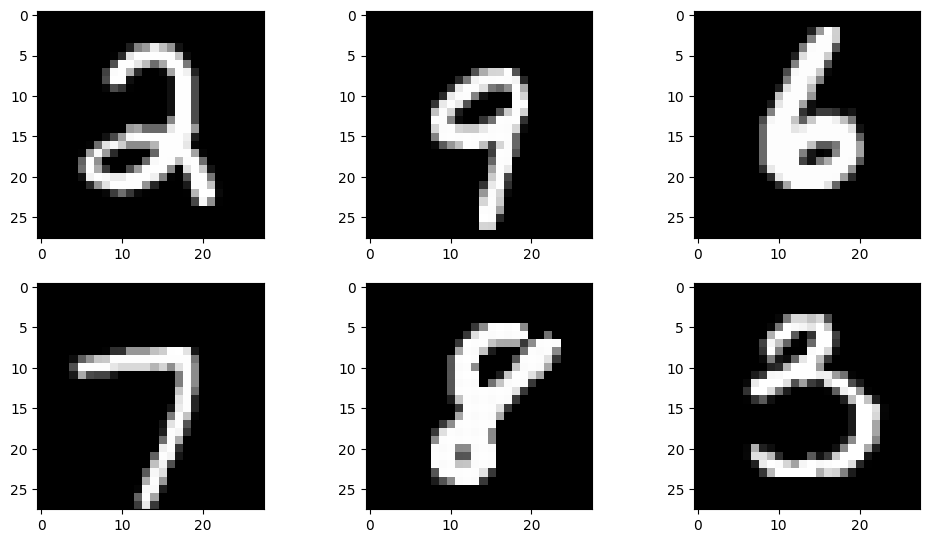

In [15]:
plt.figure(figsize=(12,10))
nrows = 3
ncols = 2

for i, image in enumerate(test_images):
    
    plt.subplot(nrows, nrows, i+1)

    plt.imshow(image.squeeze(), cmap="grey")

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [16]:
# make predictions with trained model 

from tqdm.auto import tqdm 

y_preds = []
model.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        logits = model(X)
        y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
        y_preds.append(y_pred)

    y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:04<00:00, 77.13it/s]


In [17]:
import mlxtend 
print(mlxtend.__version__)

0.23.1


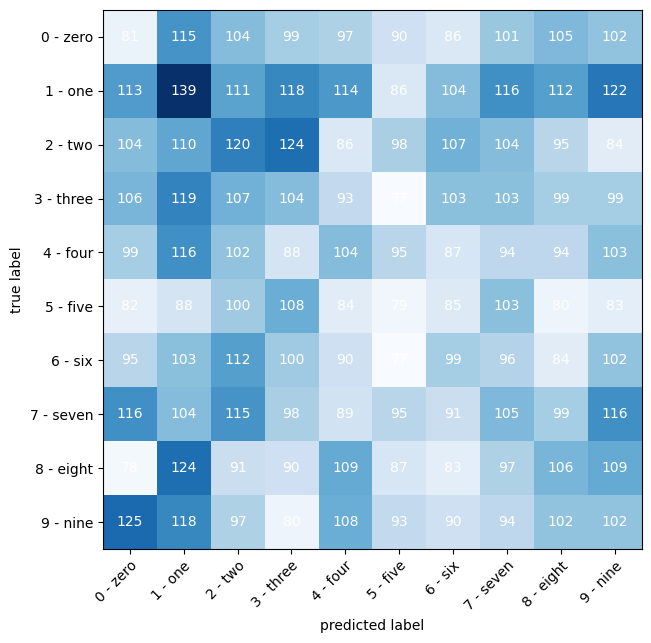

In [18]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

conftmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
conftmat_tensor = conftmat(preds = y_pred_tensor,
                           target = test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=conftmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)